In [15]:
from numpy import load, expand_dims
from sklearn.preprocessing import Normalizer, LabelEncoder
from sklearn.svm import SVC
from random import choice
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score, accuracy_score

In [16]:
# load faces
data = load('orangtu.npz')
trainX_faces, testX_faces = data['arr_0'], data['arr_2']

# load face embeddings
data = load('orangtu-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
target = trainy

# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

In [4]:
from scipy.spatial import distance
import numpy as np

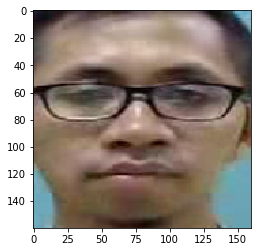

In [30]:
plt.imshow(trainX_faces[0])

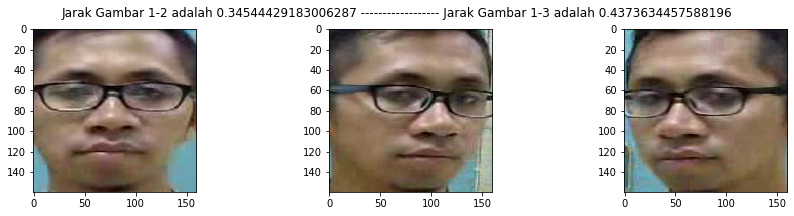

In [121]:
def show_pair(idx1, idx2, idx3):
    plt.figure(figsize=(15,3))
    #plt.suptitle(f'Jarak = {distance.euclidean(trainX[idx1], trainX[idx2]):.2f}')
    jarak1 = distance.euclidean(trainX[idx1], trainX[idx2])
    jarak2 = distance.euclidean(trainX[idx1], trainX[idx3])
    plt.suptitle('Jarak Gambar 1-2 adalah %s ------------------ Jarak Gambar 1-3 adalah %s' % (jarak1,jarak2))
    plt.subplot(131)
    plt.imshow(trainX_faces[idx1])
    plt.subplot(132)
    plt.imshow(trainX_faces[idx2])
    plt.subplot(133)
    plt.imshow(trainX_faces[idx3]);
show_pair(0,8,13)

In [84]:
mylist = [1,2,3]
print("A list: %s" % mylist)

A list: [1, 2, 3]


In [94]:
data = [88.44, 53.44]
mylist = [1,2,3]
format_string = "Hello %s"

print("Jarak 1-2 :%s & Jarak 2-3:%s" % data[0], data[1])

TypeError: not enough arguments for format string

In [64]:
distance.euclidean(trainX[0], trainX[1])

0.16196484863758087

In [59]:
distances = [] # squared L2 distance between pairs
identical = [] # 1 if same identity, 0 otherwise

num = len(trainX)

for i in range(num - 1):
    for j in range(i + 1, num):
        distances.append(distance.euclidean(trainX[i], trainX[j]))
        identical.append(1 if target[i] == target[j] else 0)
        
distances = np.array(distances)
identical = np.array(identical)

In [ ]:
import pandas as pd
from pandas import ExcelWriter

In [118]:
distances = [] # squared L2 distance between pairs
identical = [] # 1 if same identity, 0 otherwise

num = len(trainX)

for i in range(num - 1):
    for j in range(i + 1, num):
        distances.append(distance.euclidean(trainX[i], trainX[j]))
        identical.append(88 if (target[i] == 'oki') & (target[j] == 'rofik') else 99)
        
distances = np.array(distances)
identical = np.array(identical)
df = pd.DataFrame({'dist': distances, 'iden':identical})
df.to_excel('jarak-oki-rofik.xlsx')

Text(0.5, 1.0, 'Identik')

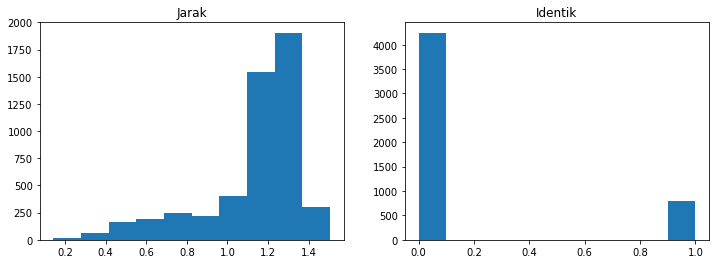

In [56]:
pyplot.figure(figsize=(12,4))

pyplot.subplot(121)
pyplot.hist(distances)
pyplot.title('Jarak')

pyplot.subplot(122)
pyplot.hist(identical)
pyplot.title('Identik')

In [62]:
distances = [] # squared L2 distance between pairs
identical = [] # 1 if same identity, 0 otherwise

num = len(trainX)

for i in range(num - 1):
    for j in range(i + 1, num):
        distances.append(distance.euclidean(trainX[i], trainX[j]))
        identical.append(1 if trainy[i] == trainy[j] else 0)
        
distances = np.array(distances)
identical = np.array(identical)

In [ ]:
identical.shape

In [81]:
thresholds = np.arange(0.1, 1.5, 0.01)

f1_scores = [f1_score(identical, distances < t) for t in thresholds]
acc_scores = [accuracy_score(identical, distances < t) for t in thresholds]

opt_idx = np.argmax(f1_scores)
# Threshold at maximal F1 score
opt_tau = thresholds[opt_idx]
# Accuracy at maximal F1 score
opt_acc = accuracy_score(identical, distances < opt_tau)

In [91]:
x = 1
print(identical[x])
print(distances[x] > 1)

1
False


In [88]:
distances[1]

0.5413330793380737

In [85]:
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
a = accuracy_score(y_true, y_pred)
a

0.5

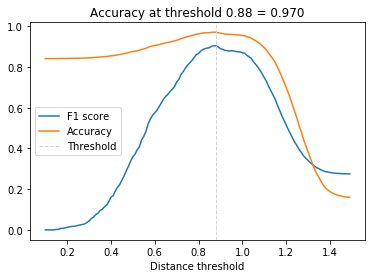

In [65]:
# Plot F1 score and accuracy as function of distance threshold
pyplot.plot(thresholds, f1_scores, label='F1 score');
pyplot.plot(thresholds, acc_scores, label='Accuracy');
pyplot.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
pyplot.title(f'Accuracy at threshold {opt_tau:.2f} = {opt_acc:.3f}');
pyplot.xlabel('Distance threshold')
pyplot.legend();

In [ ]:
dist_pos = distances[identical == 1]
dist_neg = distances[identical == 0]

In [ ]:
pyplot.figure(figsize=(12,4))

pyplot.subplot(121)
pyplot.hist(dist_pos)
pyplot.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
pyplot.title('Distances (pos. pairs)')
pyplot.legend();

pyplot.subplot(122)
pyplot.hist(dist_neg)
pyplot.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
pyplot.title('Distances (neg. pairs)')
pyplot.legend();

In [ ]:
distances.shape

In [ ]:
dst = distance.euclidean(trainX[0], trainX[1])
dst

In [ ]:
if (1==1):
    print('benar')

In [ ]:
trainy[1]

In [ ]:
x=[]
for i in range(len(trainX)):
    for j in range(len(trainX)):
        if (trainy[i]==trainy[j]):
            x.insert(i,i)
x

In [ ]:
jang=3
x=[]
for i in range(jang):
    for j in range(i+1,jang):
        x.insert(1,j)
        #if (trainy[i]==trainy[j]):
         #   x.insert(i,i)
x

In [ ]:
nrof_images = len(trainX)

print('Distance matrix')
print('    ', end='')
for i in range(nrof_images):
    print('    %1d     ' % i, end='')
    print('')
    for i in range(nrof_images):
        print('%1d  ' % i, end='')
        for j in range(nrof_images):
            dist = np.sqrt(np.sum(np.square(np.subtract(trainX[i], trainX[j]))))
            print('  %1.4f  ' % dist, end='')
            print('')

In [2]:
import numpy as np
import os.path

class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path,i)):
            metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata('datas/train')
#a = IdentityMetadata('images', )
targets = np.array([m.name for m in metadata])
targets

array(['ferry', 'ferry', 'ferry', 'ferry', 'ferry', 'ferry', 'ferry',
       'ferry', 'ferry', 'ferry', 'ferry', 'ferry', 'ferry', 'ferry',
       'ferry', 'heri', 'heri', 'heri', 'heri', 'heri', 'heri', 'heri',
       'heri', 'heri', 'heri', 'heri', 'heri', 'heri', 'heri', 'heri',
       'heri', 'jerico', 'jerico', 'jerico', 'jerico', 'jerico', 'jerico',
       'jerico', 'jerico', 'jerico', 'jerico', 'jerico', 'jerico',
       'jerico', 'jerico', 'jerico', 'jerico', 'jerico', 'jerico',
       'jerico', 'lina', 'lina', 'lina', 'lina', 'lina', 'lina', 'lina',
       'lina', 'lina', 'lina', 'lina', 'lina', 'lina', 'lina', 'lina',
       'lina', 'lina', 'oki', 'oki', 'oki', 'oki', 'oki', 'oki', 'oki',
       'oki', 'oki', 'oki', 'oki', 'oki', 'oki', 'oki', 'oki', 'oki',
       'oki', 'rofik', 'rofik', 'rofik', 'rofik', 'rofik', 'rofik',
       'rofik', 'rofik', 'rofik', 'rofik', 'rofik', 'rofik', 'rofik',
       'rofik', 'rofik', 'rofik', 'rofik'], dtype='<U6')

In [5]:
trainy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

targets = np.array([m.name for m in metadata])

encoder = LabelEncoder()
encoder.fit(targets)

# Numerical encoding of identities
y = encoder.transform(targets)

train_idx = np.arange(metadata.shape[0]) % 2 != 0
test_idx = np.arange(metadata.shape[0]) % 2 == 0

NameError: name 'np' is not defined

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

In [3]:
# develop a classifier for the 5 Celebrity Faces Dataset
from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# load dataset
data = load('5orang-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))

# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)

knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(trainX, trainy)
# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)

knn_train = knn.predict(trainX)
knn_test = knn.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)

score_knntr = accuracy_score(trainy, knn_train)
score_knnts = accuracy_score(testy, knn_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))
print('Accuracy: train=%.3f, test=%.3f' % (score_knntr*100, score_knnts*100))

Dataset: train=93, test=25
Accuracy: train=100.000, test=100.000
Accuracy: train=100.000, test=100.000


In [14]:
#trainX.shape
targets

array(['ferry', 'ferry', 'ferry', 'ferry', 'ferry', 'ferry', 'ferry',
       'ferry', 'ferry', 'ferry', 'ferry', 'ferry', 'ferry', 'ferry',
       'ferry', 'heri', 'heri', 'heri', 'heri', 'heri', 'heri', 'heri',
       'heri', 'heri', 'heri', 'heri', 'heri', 'heri', 'heri', 'heri',
       'heri', 'jerico', 'jerico', 'jerico', 'jerico', 'jerico', 'jerico',
       'jerico', 'jerico', 'jerico', 'jerico', 'jerico', 'jerico',
       'jerico', 'jerico', 'jerico', 'jerico', 'jerico', 'jerico',
       'jerico', 'lina', 'lina', 'lina', 'lina', 'lina', 'lina', 'lina',
       'lina', 'lina', 'lina', 'lina', 'lina', 'lina', 'lina', 'lina',
       'lina', 'lina', 'oki', 'oki', 'oki', 'oki', 'oki', 'oki', 'oki',
       'oki', 'oki', 'oki', 'oki', 'oki', 'oki', 'oki', 'oki', 'oki',
       'oki', 'rofik', 'rofik', 'rofik', 'rofik', 'rofik', 'rofik',
       'rofik', 'rofik', 'rofik', 'rofik', 'rofik', 'rofik', 'rofik',
       'rofik', 'rofik', 'rofik', 'rofik'], dtype='<U6')

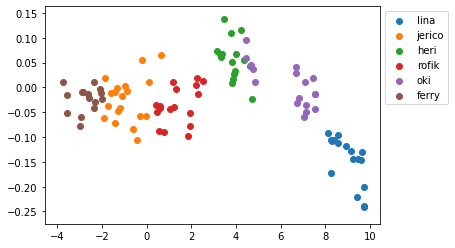

In [40]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(trainX)

for i, t in enumerate(set(targets)):
    idx = targets == t
    pyplot.scatter(X_embedded[idx, 0], trainX[idx, 1], label=t)   

pyplot.legend(bbox_to_anchor=(1, 1));


In [33]:
X_embedded[0]

array([-3.6121814,  1.2204093], dtype=float32)

In [1]:
import seaborn as sn